# Zbiór danych
Zbiór danych *kredyt.csv* zawiera informacje dotyczące wniosków o kredyt hipoteczny w penym banku. Poszczególne kolumny reprezentują różne cechy związane z każdym wnioskiem:

- Loan_ID: Unikalny identyfikator każdego wniosku o kredyt.
- Gender: Płeć osoby składającej wniosek (mężczyzna/kobieta).
- Married: Status małżeński (żonaty/nie).
- Dependents: Liczba osób na utrzymaniu osoby składającej wniosek.
- Education: Poziom edukacji osoby składającej wniosek.
- Self_Employed: Czy osoba składająca wniosek jest samozatrudniona (tak/nie).
- ApplicantIncome: Dochód osoby składającej wniosek.
- CoapplicantIncome: Dochód współmałżonka lub współmałżonki osoby składającej wniosek.
- LoanAmount: Kwota kredytu hipotecznego wnioskowana przez osobę składającą wniosek.
- Loan_Amount_Term: Okres kredytowania (w miesiącach).
- Credit_History: Historia kredytowa (czy osoba składająca wniosek miała wcześniej kredyt hipoteczny, 1 - tak, 0 - nie).
- Property_Area: Lokalizacja nieruchomości (miejska/półmiejska/wiejska).
- Loan_Status: Status kredytu (zatwierdzony/niezatwierdzony).

# Zadanie
Przeprowadź eksploracyjną analizę danych zawartych w zbiorze *kredyt.csv*.
W tym celu wykonaj m.in. nastepujące kroki:
1. zaimportj potrzebne biblioteki
2. wczytaj zbiór danych
3. scharakteryzuj zbiór (kształt, rodzaj zmiennych, statystyki opisowe)
4. sprwdź, czy w zbiorze są jakieś braki, jeśli tak zadecyduj co z nimi zrobić
5. postaw minimum 3 pytania badawcze / hipotezy badawcze; pytania badawcze powinny być złożone (min. 3 zminne). Za pomocą wykresów określ, czy postawione hipotezy były słuszne czy nie. Podsumuj jakie wnioski można wyciągnąć po przeprowadzonej analizie  .
6. zbuduj model XGBoost prognozujacy status kredytu. Dostosuj hiperparametry modelu.


#Pytania badawcze:

**1. Jaki wpyw na lokalizację nieruchomości ma edukacja, status małżeński i kwota kredytu.**

Dane:
  - LoanAmount: Kwota kredytu
  - Education: Poziom edukacji
  - Married: Status małżeński

Predykcja:
  - Property_Area: Lokalizacja nieruchomości

**2. Jaki wpyw na wielkość kredytu ma status małżeński, edukacja i lokalizacja nieruchomości .**

Dane:
  - LoanAmount: Kwota kredytu
  - Education: Poziom edukacji
  - Married: Status małżeński

Predykcja:
  - Property_Area: Lokalizacja nieruchomości

**3. Jaki wpyw na status kredytu ma kwota kredytu hipotecznego, status małżeński, edukacja .**

Dane:
  - LoanAmount: Kwota kredytu
  - Education: Poziom edukacji
  - Married: Status małżeński
  - Dependents: Liczba osób na utrzymaniu
  - Property_Area: Lokalizacja nieruchomości
  - ApplicantIncome: Dochód osoby składającej wniosek
  - Gender: Płeć osoby składającej wniosek

Predykcja:
  - Loan_Status: Status kredytu (zatwierdzony/niezatwierdzony).

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("kredyt.csv")
df.info()
print(df.isnull().sum())
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education       

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [31]:
# df = pd.read_csv("kredyt.csv")
# df.info()

# df['dependents'] = df['Dependents'].astype('category').cat.codes
# df['gender'] = df['Gender'].astype('category').cat.codes
# df['married'] = df['Married'].astype('category').cat.codes
# df['education'] = df['Education'].astype('category').cat.codes
# df['self_employed'] = df['Self_Employed'].astype('category').cat.codes
# df['property_area'] = df['Property_Area'].astype('category').cat.codes
# df['loan_status'] = df['Loan_Status'].astype('category').cat.codes

# df.pop('Gender')
# df.pop('Married')
# df.pop('Education')
# df.pop('Self_Employed')
# df.pop('Property_Area')
# df.pop('Loan_Status')
# df.pop('Loan_ID')
# df.pop('Dependents')

# df_clean = df.dropna() # Drop rows with any missing values


# df_clean = df_clean[(df >= 0).all(axis=1)] # Remove rows where any column has a negative value
# # df_clean.pop('CoapplicantIncome')
# # df_clean.pop('Loan_Amount_Term')
# # df_clean.pop('Credit_History')
# # df_clean.pop('self_employed')

# df_clean.info()
# df_clean.head()

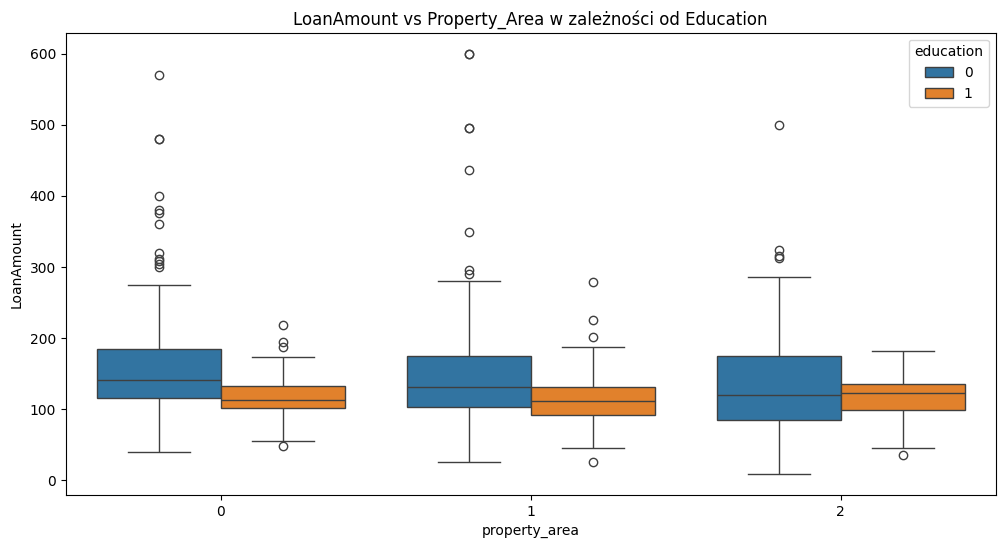

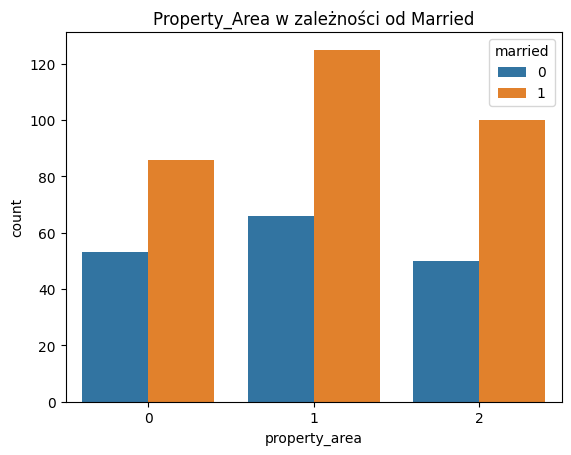

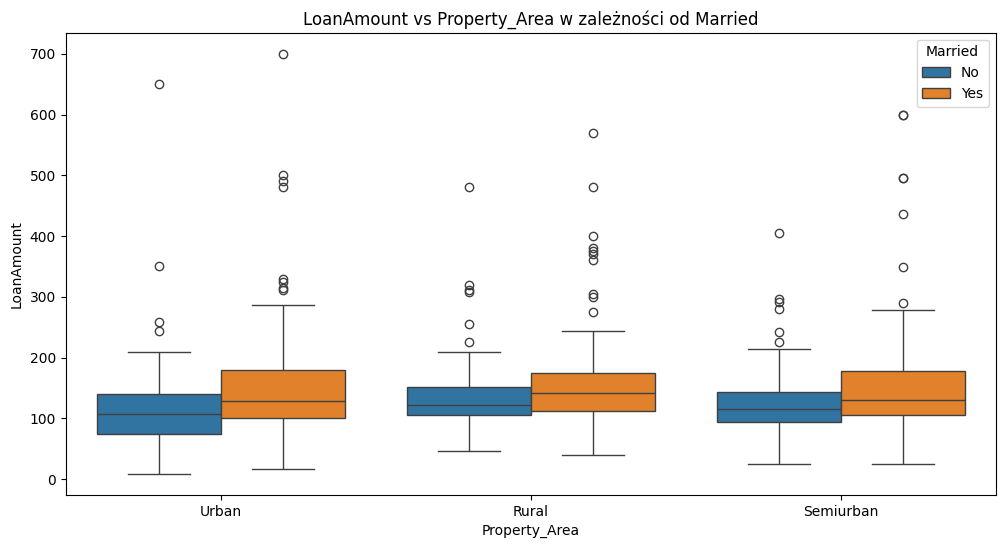

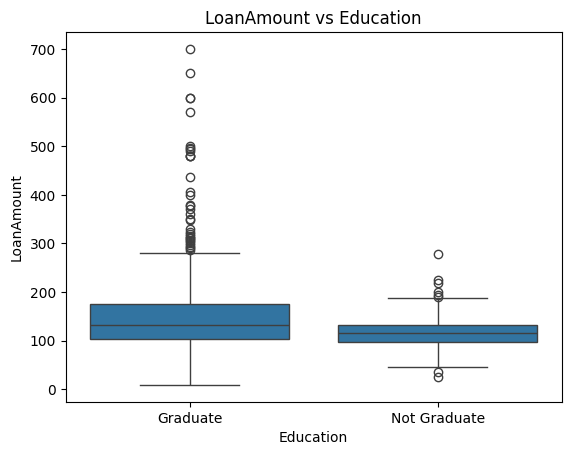

In [60]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='property_area', y='LoanAmount', hue='education', data=df_clean)
plt.title('LoanAmount vs Property_Area w zależności od Education')
plt.show()

sns.countplot(x='property_area', hue='married', data=df_clean)
plt.title('Property_Area w zależności od Married')
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(x='Property_Area', y='LoanAmount', hue='Married', data=df)
plt.title('LoanAmount vs Property_Area w zależności od Married')
plt.show()

sns.boxplot(x='Education', y='LoanAmount', data=df)
plt.title('LoanAmount vs Education')
plt.show()

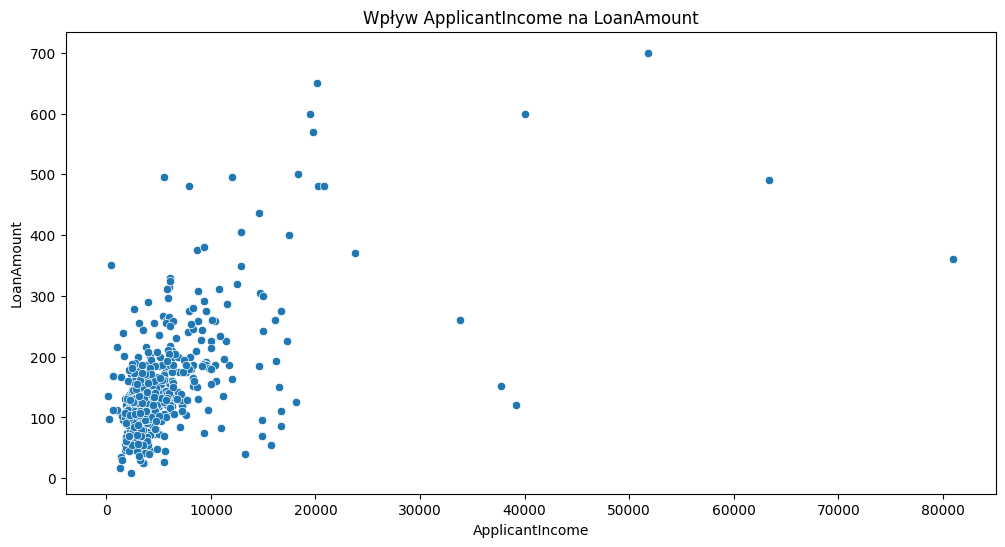

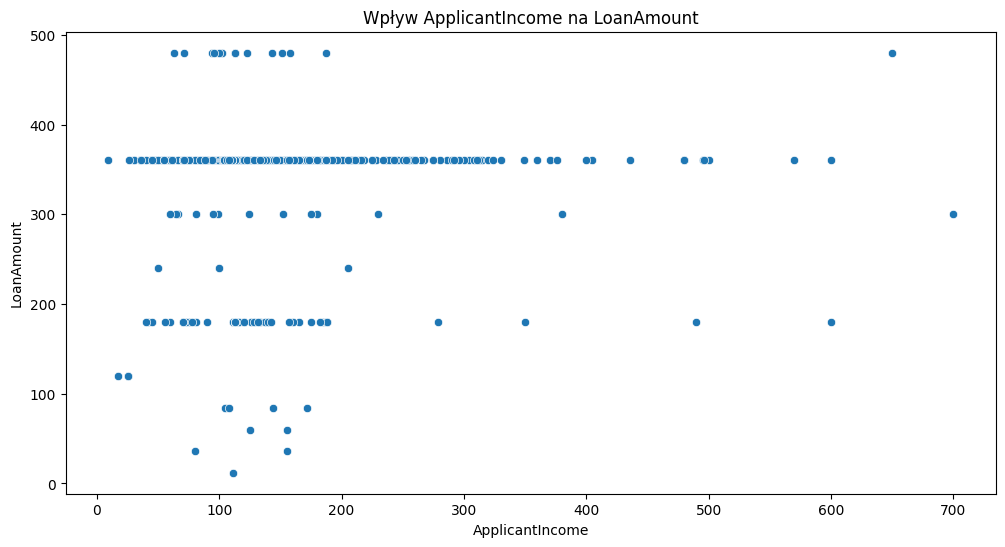

In [61]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=df)
plt.title('Wpływ ApplicantIncome na LoanAmount')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.show()


plt.figure(figsize=(12, 6))
sns.scatterplot(x='LoanAmount', y='Loan_Amount_Term', data=df)
plt.title('Wpływ ApplicantIncome na LoanAmount')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.show()

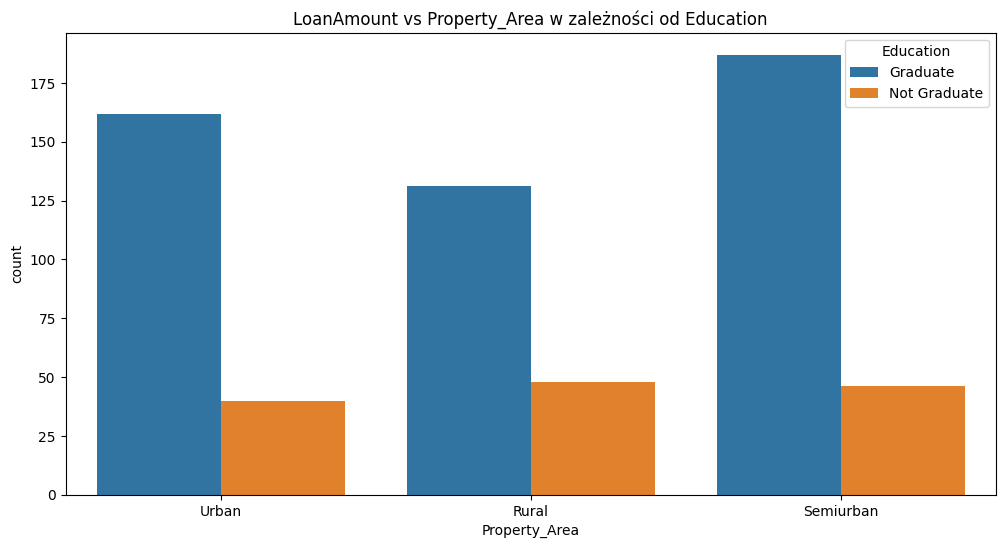

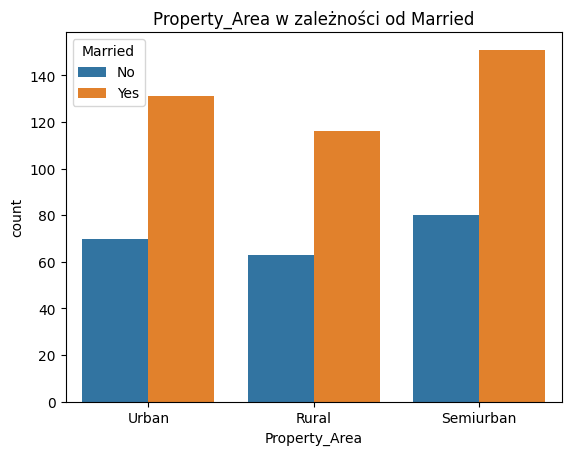

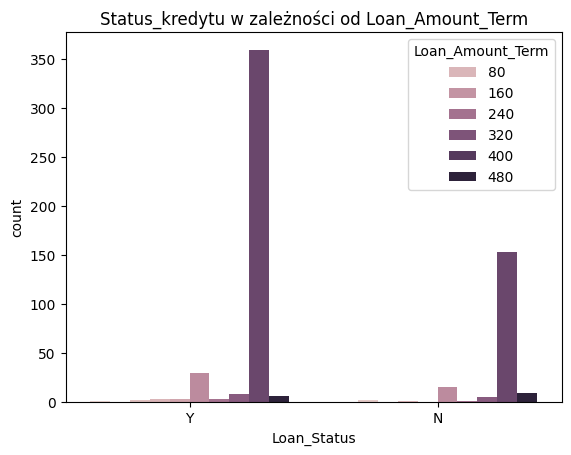

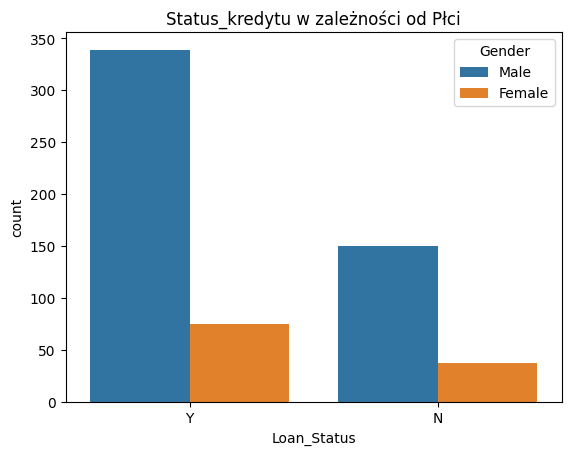

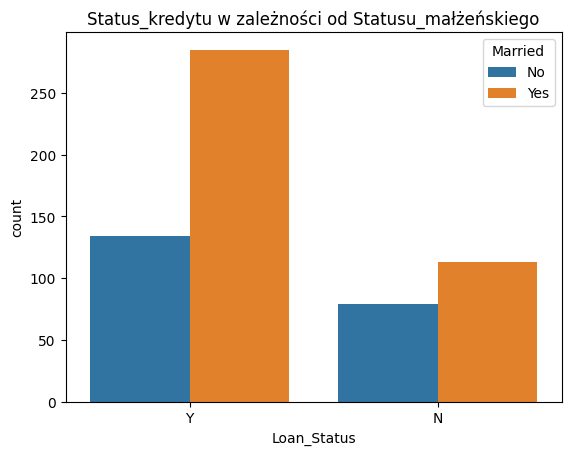

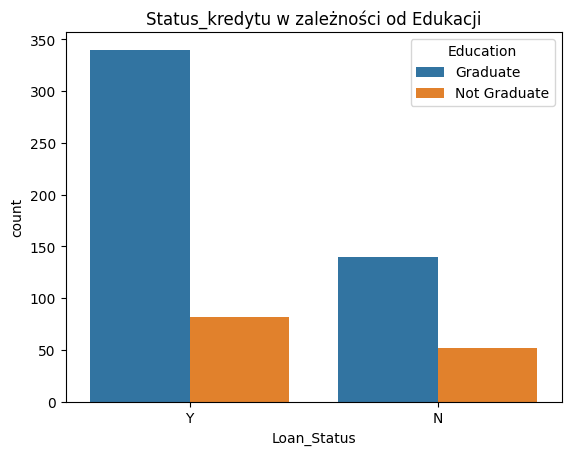

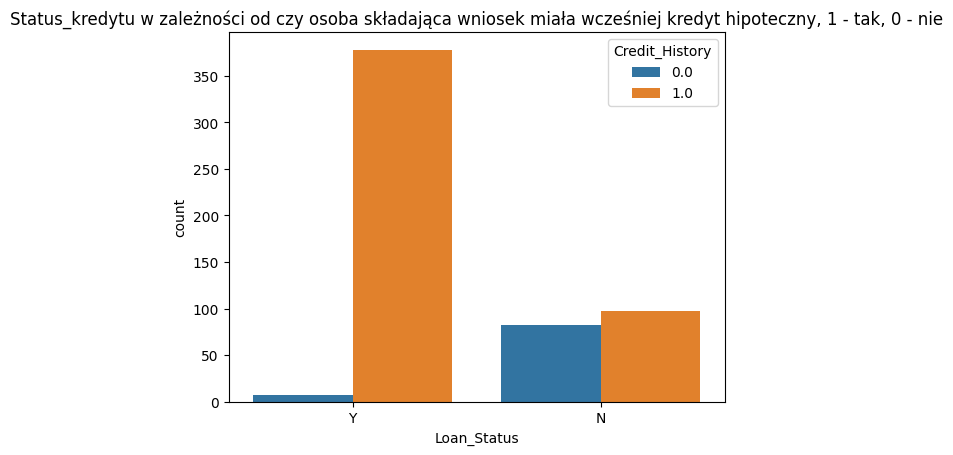

In [55]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Property_Area',  hue='Education', data=df)
plt.title('LoanAmount vs Property_Area w zależności od Education')
plt.show()

sns.countplot(x='Property_Area', hue='Married', data=df)
plt.title('Property_Area w zależności od Married')
plt.show()

sns.countplot(x='Loan_Status', hue='Loan_Amount_Term', data=df)
plt.title('Status_kredytu w zależności od Loan_Amount_Term')
plt.show()

sns.countplot(x='Loan_Status', hue='Gender', data=df)
plt.title('Status_kredytu w zależności od Płci')
plt.show()

sns.countplot(x='Loan_Status', hue='Married', data=df)
plt.title('Status_kredytu w zależności od Statusu_małżeńskiego')
plt.show()


sns.countplot(x='Loan_Status', hue='Education', data=df)
plt.title('Status_kredytu w zależności od Edukacji')
plt.show()

sns.countplot(x='Loan_Status', hue='Credit_History', data=df)
plt.title('Status_kredytu w zależności od czy osoba składająca wniosek miała wcześniej kredyt hipoteczny, 1 - tak, 0 - nie')
plt.show()

In [59]:
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area', 'Loan_Status']

for column in categorical_columns:
    print(f"Statystyki dla {column}:")
    print(df[column].value_counts())
    print("\n")


Statystyki dla Gender:
Gender
Male      489
Female    112
Name: count, dtype: int64


Statystyki dla Married:
Married
Yes    398
No     213
Name: count, dtype: int64


Statystyki dla Dependents:
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


Statystyki dla Education:
Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


Statystyki dla Self_Employed:
Self_Employed
No     500
Yes     82
Name: count, dtype: int64


Statystyki dla Credit_History:
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64


Statystyki dla Property_Area:
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


Statystyki dla Loan_Status:
Loan_Status
Y    422
N    192
Name: count, dtype: int64


